# Pentatonic Television: Predicting Future TV buyers
### Author: Robin Yadav

## Introduction

**Problem**:
You work for the fictive electronic company called Pentatonic specialized into selling
high-end televisions. 
One day, your manager comes to you and ask you to build a model in
order to identify potential future TV buyers. Interestingly, the company has access to the data of
thousands customers and wants to prepare a marketing campaign toward the clients of the
company Meridian that was just purchased by Pentatonic. Can you help your manager?
The data set comes into two different files. You can do anything you want with it just as long as
you can build an awesome predictive model. What are the most important desired
characteristics of a potential customer? Who will less likely respond to the campaign?
You have 11 days to come up with a solution.

This project is divided in 5 sections:

    1.Data Exploration
    
        1.1 The Data, Data Description & Preprocessing

        1.2 Removing Duplicate observations
    
        1.3 Assessing Missing Values
    
        1.4 Investigating the datasets

        1.5 Re-encoding Some Features


    2.0 Some Data Visualization
     
     
    3.0 Encoding Categorical Features for Machine Learning
     
      
    4.0 Model Selection: Logitic Regression, Gradient Boosting and Random Forest
        
        4.1 Feature Importances
        
    5.0 Conclusion


In [1]:
" Importing libraries " 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline





In [2]:
# Functions used in this project
""" Visualize the Numerical Features """
def visualize_num_feature(elect_prof):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(elect_prof)
    plt.subplot(1,2,2)
    sns.distplot(elect_prof, bins=20)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(elect_prof):
    stat =  elect_prof.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))     
    

#  1-Data Exploration
## 1.1 The Data, Data Description & Preprocessing
- Two files: "electronics.csv" and "profile.xlsv"

In [3]:
## reading "electronics.csv"
elect_df = pd.read_csv('electronics.csv')

print("Number of records (rows) Datasets: ", elect_df.shape[0])
print("Number of features (columns) Datasets: ", elect_df.shape[1])
print("\nColumns names datasets: \n", elect_df.columns.tolist())

## converting 'Date of year' to datetime format
elect_df['Date of year'] = pd.to_datetime(elect_df['Date of year'])

print("\n\n\nDatasets Information: ")
display(elect_df.info())
display(elect_df.head())

Number of records (rows) Datasets:  20500
Number of features (columns) Datasets:  16

Columns names datasets: 
 ['Date of year', 'clients', 'previously_shoped', 'member', 'promotion', 'shop_competitor', 'prize_won', 'require_financing', 'got_a_TV', 'did_a purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics']



Datasets Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date of year       20490 non-null  datetime64[ns]
 1   clients            20500 non-null  int64         
 2   previously_shoped  20490 non-null  float64       
 3   member             20490 non-null  float64       
 4   promotion          20490 non-null  float64       
 5   shop_competitor    20490 non-null  float64       
 6   prize_won          20490 non-null  float64     

None

,Date of year,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,NaN,1.0
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,2018-10-31,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


In [4]:
#Reading "profile.xslx"
prof_df =  pd.read_excel('profile.xlsx')

print("Number of records (rows) Datasets: ", prof_df.shape[0])
print("Number of features (columns) Datasets: ", prof_df.shape[1])
print("\nColumns names datasets: \n", prof_df.columns.tolist())

print("\n\n\nDatasets Information: ")
display(prof_df.info())
display(prof_df.head())

Number of records (rows) Datasets:  20500
Number of features (columns) Datasets:  11

Columns names datasets: 
 ['date', 'clients', 'female', 'email', 'live_with_parents', 'work', 'family', 'state', 'education', 'age', 'monthly_spent_electronics']



Datasets Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       20500 non-null  datetime64[ns]
 1   clients                    20500 non-null  int64         
 2   female                     20500 non-null  int64         
 3   email                      20500 non-null  int64         
 4   live_with_parents          20500 non-null  int64         
 5   work                       20500 non-null  int64         
 6   family                     20500 non-null  int64         
 7   state                      20500 non-null  in

None

,date,clients,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
0,2018-08-31,1,1,1,1,1,4,5,1,40,5916.666667
1,2017-10-31,2,0,1,0,3,0,1,3,57,5583.333333
2,2018-05-31,3,1,1,0,3,2,6,2,46,2666.666667
3,2018-01-31,4,1,1,0,2,4,5,5,72,5833.333333
4,2018-10-31,5,1,1,0,2,1,6,1,79,4916.666667


In [5]:
"""
    Combine two different files base 'clients--client ID'
    
"""
print(elect_df.clients.nunique())
print(prof_df.clients.nunique())

display(elect_df.columns)
display(prof_df.columns)

## merging two dataframes
elect_prof = pd.merge(elect_df, prof_df)

## renaming columns name -- 'Date of year' -> 'Date_of_purchase' and 'date' -> 'Date_of_transaction'
# 'did_a purchase' --> 'did_a_purchase'
elect_prof = elect_prof.rename(columns={'Date of year':'Date_of_purchase', 
                                        'date':'Date_of_transaction',
                                       'did_a purchase': 'did_a_purchase'})

display(elect_prof.head())

20500
20500


Index(['Date of year', 'clients', 'previously_shoped', 'member', 'promotion',
       'shop_competitor', 'prize_won', 'require_financing', 'got_a_TV',
       'did_a purchase', 'promotions_used', 'LT_clients', 'prize_amount',
       'amount_financing', 'amount_purchase', 'nb_electronics'],
      dtype='object')

Index(['date', 'clients', 'female', 'email', 'live_with_parents', 'work',
       'family', 'state', 'education', 'age', 'monthly_spent_electronics'],
      dtype='object')

,Date_of_purchase,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a_purchase,...,Date_of_transaction,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018-08-31,1,1,1,1,4,5,1,40,5916.666667
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2017-10-31,0,1,0,3,0,1,3,57,5583.333333
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2018-05-31,1,1,0,3,2,6,2,46,2666.666667
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2018-01-31,1,1,0,2,4,5,5,72,5833.333333
4,2018-10-31,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2018-10-31,1,1,0,2,1,6,1,79,4916.666667


##  1.2 Removing Duplicate observations

In [6]:
"""
    - find and remove duplicate rows in dataframe
"""

# check the number of duplicated rows
# no. of rows is identical to other row or rows
print("No. of duplicate rows: ", elect_prof.duplicated(keep='first').sum()) 

# Check for this duplicate rows as a dataframe
display(elect_prof.loc[elect_prof.duplicated(keep='first')])


### Remove the duplicate rows #####
elect_prof = elect_prof.drop_duplicates(keep='first')
# check the dataset dimension
print("\nDimension of hotel_data after removing duplicates: ", elect_prof.shape)

No. of duplicate rows:  0


,Date_of_purchase,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a_purchase,...,Date_of_transaction,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics



Dimension of hotel_data after removing duplicates:  (20500, 26)


## 1.3 Assessing Missing Values

In [7]:
"""
    - Identify the missing values
"""

missing_data = elect_prof.isnull().sum(axis=0)
print("No. of missing data in each columns: \n", missing_data)

columns_with_missing_value = elect_prof.columns[elect_prof.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)


# def null_columns(df):
#     return(pd.isnull(df).sum())

# for dataset in datasets: --> datasets = [elect_df, prof_df]
#     print("The data set has", dataset.shape[0], "rows and", dataset.shape[1], "columns")
#     print(null_columns(dataset))


No. of missing data in each columns: 
 Date_of_purchase               10
clients                         0
previously_shoped              10
member                         10
promotion                      10
shop_competitor                10
prize_won                      10
require_financing              10
got_a_TV                       10
did_a_purchase                 10
promotions_used                10
LT_clients                     10
prize_amount                   10
amount_financing               10
amount_purchase              1023
nb_electronics                 10
Date_of_transaction             0
female                          0
email                           0
live_with_parents               0
work                            0
family                          0
state                           0
education                       0
age                             0
monthly_spent_electronics       0
dtype: int64

 Columns name which has missing value:  ['Date_of_purchase', 'p

## 1.4 Investigating the datasets

### Analysis "amount_purchase" feature 

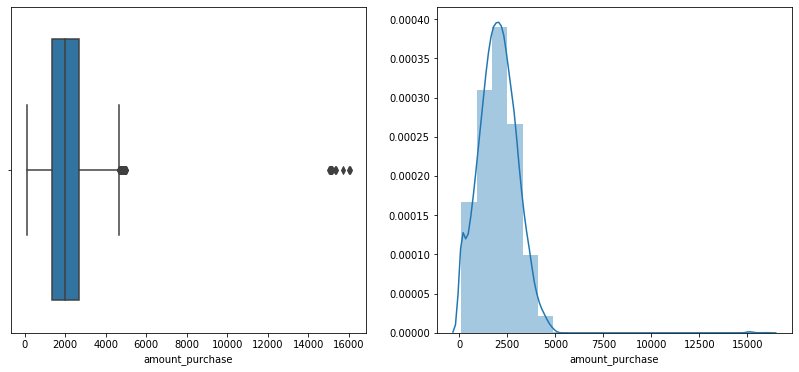

count    19477.000000
mean      2017.965806
std       1032.918770
min        100.000000
25%       1340.000000
50%       2000.000000
75%       2670.000000
max      16050.000000
Name: amount_purchase, dtype: float64
The upper and lower bounds for suspected outliers are 4665.0 and -655.0


In [8]:
## Analysis "amount_purchase" feature 
visualize_num_feature(elect_prof.amount_purchase)
stat_summary(elect_prof.amount_purchase)

# impute with median, will see it soon

### Checking NaN
- There are 10 missing values in target variable "got_a_TV" and it is not good idea to impute the missing values in target variable

In [9]:
## Remove rows where the target variable values are NaN --> "got_a_TV"
elect_prof = elect_prof[~elect_prof['got_a_TV'].isna()]

# Let's check the dataframe
print("Check after dropping NaN values:\n", elect_prof.isna().sum())

Check after dropping NaN values:
 Date_of_purchase                0
clients                         0
previously_shoped               0
member                          0
promotion                       0
shop_competitor                 0
prize_won                       0
require_financing               0
got_a_TV                        0
did_a_purchase                  0
promotions_used                 0
LT_clients                      0
prize_amount                    0
amount_financing                0
amount_purchase              1013
nb_electronics                  0
Date_of_transaction             0
female                          0
email                           0
live_with_parents               0
work                            0
family                          0
state                           0
education                       0
age                             0
monthly_spent_electronics       0
dtype: int64


### Analysis "amount_purchase" feature for possible imputation

(19477, 26)


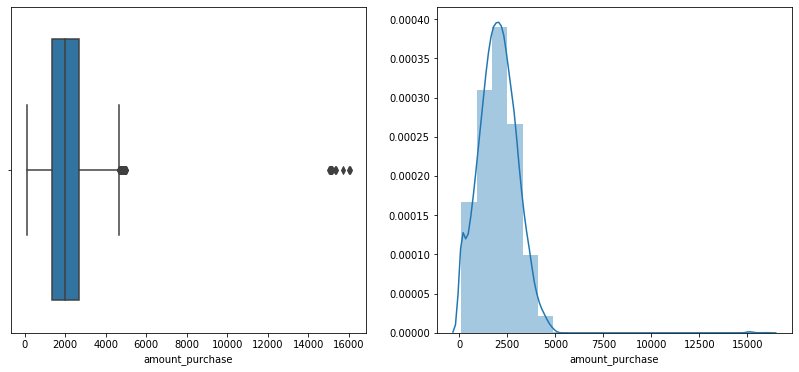

count    19477.000000
mean      2017.965806
std       1032.918770
min        100.000000
25%       1340.000000
50%       2000.000000
75%       2670.000000
max      16050.000000
Name: amount_purchase, dtype: float64
The upper and lower bounds for suspected outliers are 4665.0 and -655.0


In [10]:
## Analysis "amount_purchase" feature 

# Remove the missing values to see the distribution to see if we should do an
# imputation by the mean or median
tmp = elect_prof[~elect_prof['amount_purchase'].isna()]
print(tmp.shape)
# Look at the distribution
visualize_num_feature(tmp['amount_purchase'])
stat_summary(tmp['amount_purchase'])


# Make an executive decision :-) 
# Impute by the median, but only later

## Analysis Relationship between features

In [11]:
elect_prof.head()

,Date_of_purchase,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a_purchase,...,Date_of_transaction,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018-08-31,1,1,1,1,4,5,1,40,5916.666667
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2017-10-31,0,1,0,3,0,1,3,57,5583.333333
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2018-05-31,1,1,0,3,2,6,2,46,2666.666667
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2018-01-31,1,1,0,2,4,5,5,72,5833.333333
4,2018-10-31,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2018-10-31,1,1,0,2,1,6,1,79,4916.666667


### Promotions_used vs. promotion ?

In [12]:
## Promotions_used vs. promotion ?
# Look at the two columns
elect_prof[['promotion', 'promotions_used']]

"""
Note: Few customer did not have a promotion but it was found that the 
        the corresponding customer used promotion
        
        Looks like data discrepancy --> ????

"""

# Proportion of promotion used when promotion = 0:
promo_0 = elect_prof[elect_prof['promotion'] == 0]
print(promo_0['promotions_used'].value_counts())

# Proportion of promotion used when promotion = 1:
promo_1 = elect_prof[elect_prof['promotion'] == 1]
print(promo_1['promotions_used'].value_counts())

# Proportion of promotions:
print(elect_prof['promotion'].value_counts())

# Remove clients with  promotions_used > 6
elect_prof = elect_prof[elect_prof['promotions_used'] < 6]

"""
    Note: It looks like this this tow columns has discrepancy, 
    it is better to remove

"""
print("Checking dimension:\n", elect_prof.shape)
# Conclusion: Questions to ask your manager or DBA

1.0     5037
2.0     5009
3.0     1666
4.0      386
5.0       94
12.0       6
13.0       1
Name: promotions_used, dtype: int64
2.0     3451
1.0     3430
3.0     1093
4.0      239
5.0       74
13.0       2
12.0       2
Name: promotions_used, dtype: int64
0.0    12199
1.0     8291
Name: promotion, dtype: int64
Checking dimension:
 (20479, 26)


### Analyzing Relationship between 
- 'previously_shoped', 'did_a purchase', 'got_a_TV', 'amount_purchase'

In [13]:
# Understand the logic between columns
elect_prof[['previously_shoped', 'did_a_purchase', 'got_a_TV', 'amount_purchase']].head()

# Look at "did_a purchase" and 'amount_purchase'
elect_prof[['did_a_purchase', 'amount_purchase']]

# Let's look at how many zeros we have for 'did_a_purchase'
elect_prof[elect_prof['did_a_purchase'] == 0]
"""
    Intuitively, if there is no 'did_a_purchase' then the 'amount_purchase' 
    must be zero


"""
# How many NaN do we have associated with did_a purchase = 0?
print(elect_prof[elect_prof['did_a_purchase'] == 0].shape)
print(elect_prof['amount_purchase'].isna().sum())

## This matches

# check
elect_prof[elect_prof['did_a_purchase'] == 1]['amount_purchase'].value_counts()


# Interestingly, it matches all the NaNs in this column
# Therefore, we should encode the missing value as 0
elect_prof = elect_prof.fillna(0)

# check
print(elect_prof.isna().sum())

## No missing values now

(1013, 26)
1013
Date_of_purchase             0
clients                      0
previously_shoped            0
member                       0
promotion                    0
shop_competitor              0
prize_won                    0
require_financing            0
got_a_TV                     0
did_a_purchase               0
promotions_used              0
LT_clients                   0
prize_amount                 0
amount_financing             0
amount_purchase              0
nb_electronics               0
Date_of_transaction          0
female                       0
email                        0
live_with_parents            0
work                         0
family                       0
state                        0
education                    0
age                          0
monthly_spent_electronics    0
dtype: int64


### Is "require_financing" compatible with "amount_financing"?


In [14]:
# Is "require_financing" compatible with "amount_financing"?
elect_prof[['require_financing', 'amount_financing']]

# Look at the amount financed for clients requiring no financing
elect_prof[elect_prof['amount_financing'] == 0]['require_financing'].value_counts()

# Check if clients who have required financing didn't get 0$
(elect_prof[elect_prof['require_financing'] == 1]['amount_financing'] == 0).sum()

0

### 'prize_won', 'prize_amount'

In [15]:
# Let's look at the columns
elect_prof[['prize_won', 'prize_amount']]

# Huge discrepancies between these to columns: 
# Ask manager and/or colleagues for more information
# Random assumptions here: Assuming that prize amount is right
elect_prof = elect_prof.drop('prize_won', axis=1)

# check
print(elect_prof.shape)

(20479, 25)


In [16]:
# Sanity check:
elect_prof.describe().T

,count,mean,std,min,25%,50%,75%,max
clients,20479.0,10246.916890,5914.673294,1.000000,5125.500000,10247.0,15368.500000,20490.000000
previously_shoped,20479.0,0.091606,0.363926,0.000000,0.000000,0.0,0.000000,9.000000
member,20479.0,0.250647,0.433396,0.000000,0.000000,0.0,1.000000,1.000000
promotion,20479.0,0.404658,0.490838,0.000000,0.000000,0.0,1.000000,1.000000
shop_competitor,20479.0,0.349919,0.476956,0.000000,0.000000,0.0,1.000000,1.000000
require_financing,20479.0,0.248938,0.432408,0.000000,0.000000,0.0,0.000000,1.000000
got_a_TV,20479.0,0.100640,0.300858,0.000000,0.000000,0.0,0.000000,1.000000
did_a_purchase,20479.0,0.950535,0.216843,0.000000,1.000000,1.0,1.000000,1.000000
promotions_used,20479.0,1.806924,0.840735,1.000000,1.000000,2.0,2.000000,5.000000
LT_clients,20479.0,10.174081,6.201481,0.000000,7.000000,10.0,13.000000,131.000000


### 'previously_shoped' 

In [17]:
# Let's look at 'previously_shoped' feature: Unusual values
elect_prof.previously_shoped.value_counts()

# Remove observations with value = 9: It should be either '0' and '1'
elect_prof = elect_prof[elect_prof['previously_shoped'] != 9]

### 'female'

In [18]:
# Female column: 
print(elect_prof['female'].value_counts())

# Level 9 is undefined, it must be either '0' or '1'
# To keep the raw original data set intact,
elect_prof = elect_prof[elect_prof['female'] < 2]

print(elect_prof['female'].value_counts())

1    11114
0     9337
9       14
Name: female, dtype: int64
1    11114
0     9337
Name: female, dtype: int64


### 'family'

In [19]:
# Let's look at the amount of siblings
print(elect_prof['family'].value_counts())

# Let's remove rows with a value of 99
elect_prof= elect_prof[elect_prof['family'] < 10]

print(elect_prof['family'].value_counts())

0     12140
2      2748
1      2257
3      1518
4      1088
5       555
6       132
99       11
7         2
Name: family, dtype: int64
0    12140
2     2748
1     2257
3     1518
4     1088
5      555
6      132
7        2
Name: family, dtype: int64


### 'age'

Visulaize age Feature


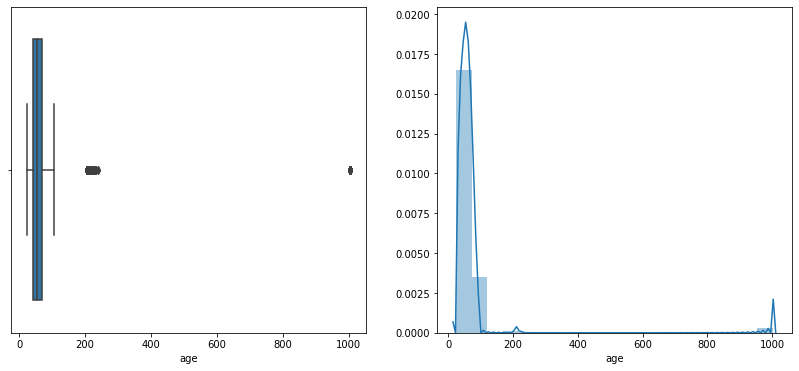

count    20440.000000
mean        68.239873
std        112.893159
min         23.000000
25%         41.000000
50%         54.000000
75%         68.000000
max       1003.000000
Name: age, dtype: float64
The upper and lower bounds for suspected outliers are 108.5 and 0.5


In [20]:
### 'age'
print('Visulaize age Feature')
visualize_num_feature(elect_prof.age)
stat_summary(elect_prof.age)

Visulaize family Feature


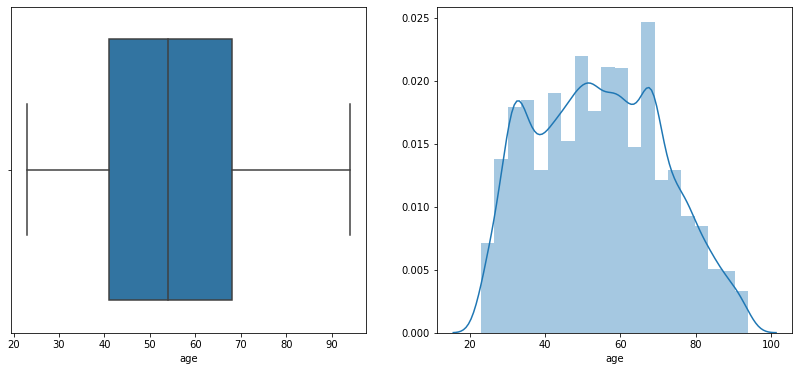

count    20440.000000
mean        54.361692
std         16.879985
min         23.000000
25%         41.000000
50%         54.000000
75%         68.000000
max         94.000000
Name: age, dtype: float64
The upper and lower bounds for suspected outliers are 108.5 and 0.5


In [21]:
# ## take care of outliers
mean_amt_purc = elect_prof['age'].mean()
elect_prof["age"] = np.where(elect_prof["age"] > 100, 
                                         mean_amt_purc, elect_prof['age'])

### 'prize_amount'
print('Visulaize family Feature')
visualize_num_feature(elect_prof['age'])
stat_summary(elect_prof['age'])

## This may cause data leakage because train and test data are not splitted

In [22]:
## Sanity check
print(elect_prof.shape)
elect_prof.head()

(20440, 25)


,Date_of_purchase,clients,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a_purchase,promotions_used,...,Date_of_transaction,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2018-08-31,1,1,1,1,4,5,1,40.0,5916.666667
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,2017-10-31,0,1,0,3,0,1,3,57.0,5583.333333
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2018-05-31,1,1,0,3,2,6,2,46.0,2666.666667
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2018-01-31,1,1,0,2,4,5,5,72.0,5833.333333
4,2018-10-31,5,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,...,2018-10-31,1,1,0,2,1,6,1,79.0,4916.666667


### "Date_of_purchase" and "Date_of_transaction"

False    11072
True      9368
dtype: int64


,Diff_time,Date_of_purchase,Date_of_transaction
0,0.0,2018-08-31,2018-08-31
1,0.0,2017-10-31,2017-10-31
2,0.0,2018-05-31,2018-05-31
3,0.0,2018-01-31,2018-01-31
4,0.0,2018-10-31,2018-10-31
...,...,...,...
20485,120.0,2018-02-28,2017-10-31
20486,30.0,2018-04-30,2018-03-31
20487,153.0,2018-09-30,2018-04-30
20488,273.0,2018-07-31,2017-10-31


Visulaize Diff_time Feature
count    20440.000000
mean       129.588943
std         94.113222
min          0.000000
25%         59.000000
50%        120.000000
75%        184.000000
max        365.000000
Name: Diff_time, dtype: float64
The upper and lower bounds for suspected outliers are 371.5 and -128.5


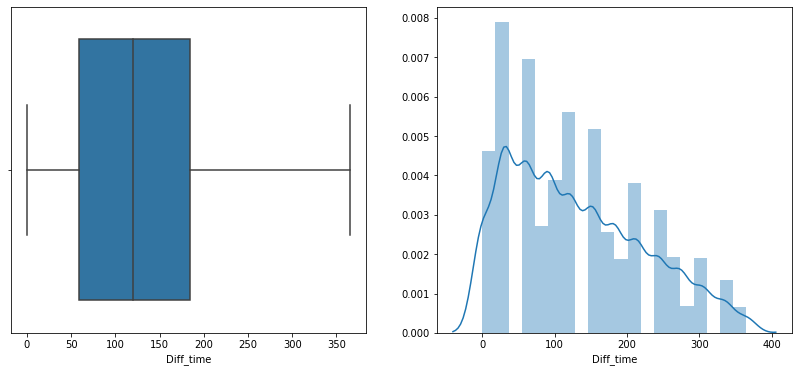

(20440, 23)


In [23]:
# Addressing seasonality, and maybe creating a new feature?
elect_prof[['Date_of_purchase', 'Date_of_transaction']]

# Can we use the date with confidence?
(elect_prof['Date_of_purchase'] == elect_prof['Date_of_transaction']).sum()

# # We will drop both columns
# data = data.drop(['date', 'Date of year'], axis=1)

### checking 'Date_of_purchase' and 'Date_of_transaction'
date_compare = pd.concat([elect_prof['Date_of_purchase'], elect_prof['Date_of_transaction']]
                         ,axis=1)
date_compare

# comparison of 'Date_of_purchase' and 'Date_of_transaction
print((elect_prof['Date_of_purchase'] < elect_prof['Date_of_transaction']).value_counts())

## new columns:

# elect_prof['Diff_time'] = (elect_prof['Date_of_purchase'] - elect_prof['Date_of_transaction']).abs()
elect_prof['Diff_time'] = ((elect_prof['Date_of_purchase'] - elect_prof['Date_of_transaction']).abs()) / np.timedelta64(1,'D')
display(elect_prof[['Diff_time','Date_of_purchase','Date_of_transaction']])


## visualizatio new 'Diff_time' feature

print('Visulaize Diff_time Feature')
stat_summary(elect_prof.Diff_time)
visualize_num_feature(elect_prof.Diff_time)

## Removing 'Date_of_purchase' and 'Date_of_transaction'

elect_prof = elect_prof.drop(['Date_of_purchase', 'Date_of_transaction', 'Diff_time'], axis=1)
print(elect_prof.shape)

### "family", "state", "work"



Features and their Frequencies: 
 0    12140
2     2748
1     2257
3     1518
4     1088
5      555
6      132
7        2
Name: family, dtype: int64
Features Name:  family


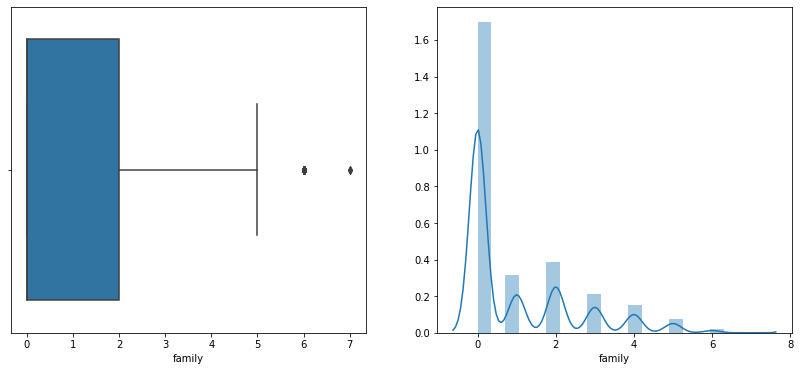

count    20440.000000
mean         0.990215
std          1.450490
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          7.000000
Name: family, dtype: float64
The upper and lower bounds for suspected outliers are 5.0 and -3.0


Features and their Frequencies: 
 6    6421
5    4195
4    3294
1    2797
3    2211
2    1522
Name: state, dtype: int64
Features Name:  state


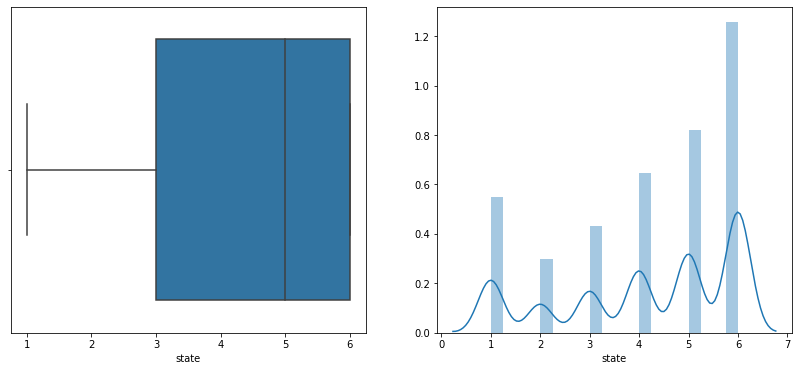

count    20440.00000
mean         4.16590
std          1.75271
min          1.00000
25%          3.00000
50%          5.00000
75%          6.00000
max          6.00000
Name: state, dtype: float64
The upper and lower bounds for suspected outliers are 10.5 and -1.5


Features and their Frequencies: 
 2    6270
1    4555
3    3865
4    2233
6    2180
5    1337
Name: work, dtype: int64
Features Name:  work


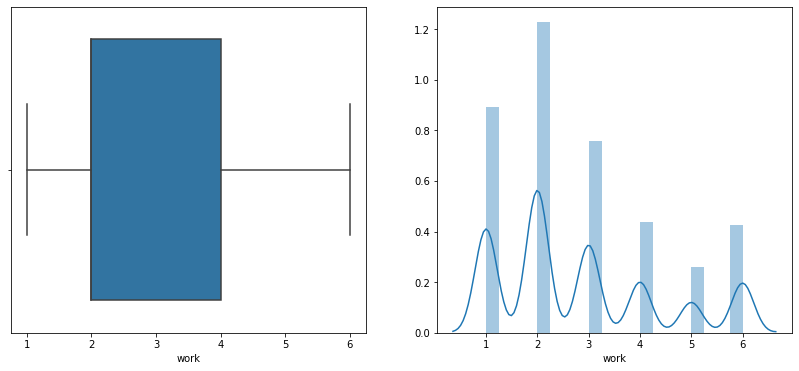

count    20440.000000
mean         2.807583
std          1.578611
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: work, dtype: float64
The upper and lower bounds for suspected outliers are 7.0 and -1.0


In [24]:
## Analysis of each features
temp = ["family", "state", "work"]
for col in temp:
    print("\n\nFeatures and their Frequencies: \n",elect_prof[col].value_counts())
    print("Features Name: ", col)
    visualize_num_feature(elect_prof[col])
    stat_summary(elect_prof[col])  


## 1.5 Re-encoding Some Features

In [25]:
## # Encoding some features into a more adequate format

# Encode Family feature
elect_prof['family'] = ['No kids' if x == 0
                 else '1 child' if x == 1
                 else '2 children' if x == 2
                 else '3 children' if x == 3
                 else '4+ children' if x >= 4
                 else 'N/A'
                 for x in elect_prof['family']]

# Encode State feature
elect_prof['state'] = ['California' if x == 1
                else 'Vermont' if x == 2
                else 'Colorado' if x == 3
                else 'Hawaii' if x == 4
                else 'Maine' if x == 5
                else 'Illinois'
                for x in elect_prof['state']]

# Encode Education feature ? :-) 

# Encode Work feature ? :-)

elect_prof['work'] = ['professional' if x == 1
               else 'manager' if x == 2
               else 'blue_collar' if x == 3
               else 'white_Collar' if x == 4
               else 'retired' if x == 5
               else 'no_job'
               for x in elect_prof['work']]

In [26]:
elect_prof.head()

,clients,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a_purchase,promotions_used,LT_clients,...,nb_electronics,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,...,1.0,1,1,1,professional,4+ children,Maine,1,40.0,5916.666667
1,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,...,1.0,0,1,0,blue_collar,No kids,California,3,57.0,5583.333333
2,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,...,1.0,1,1,0,blue_collar,2 children,Illinois,2,46.0,2666.666667
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,...,1.0,1,1,0,manager,4+ children,Maine,5,72.0,5833.333333
4,5,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,...,0.0,1,1,0,manager,1 child,Illinois,1,79.0,4916.666667


In [27]:
elect_prof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20440 entries, 0 to 20489
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   clients                    20440 non-null  int64  
 1   previously_shoped          20440 non-null  float64
 2   member                     20440 non-null  float64
 3   promotion                  20440 non-null  float64
 4   shop_competitor            20440 non-null  float64
 5   require_financing          20440 non-null  float64
 6   got_a_TV                   20440 non-null  float64
 7   did_a_purchase             20440 non-null  float64
 8   promotions_used            20440 non-null  float64
 9   LT_clients                 20440 non-null  float64
 10  prize_amount               20440 non-null  float64
 11  amount_financing           20440 non-null  float64
 12  amount_purchase            20440 non-null  float64
 13  nb_electronics             20440 non-null  flo

## 2.0 Some Data Visualization

In [28]:
"""
    Listing numerical and categorical data types columns
"""
num_int_type = elect_prof.select_dtypes(include='int64').columns.tolist()
# print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = elect_prof.select_dtypes(include='float64').columns.tolist()
# print("\nNumeric-Float Types columns name: \n", num_float_type)

num_type = num_int_type + num_float_type
print("\nNumeric Types columns name: \n", num_type)

cat_object_type = elect_prof.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric Types columns name: 
 ['clients', 'female', 'email', 'live_with_parents', 'education', 'previously_shoped', 'member', 'promotion', 'shop_competitor', 'require_financing', 'got_a_TV', 'did_a_purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics', 'age', 'monthly_spent_electronics']


Categorical Types columns name: 
 ['work', 'family', 'state']


In [29]:
## Summary Stats for numerical and categorical columns

print("Summary statistics of Numerical Features:")
display(elect_prof[num_type].describe().T)

print("Summary statistics of Categorical Features:")
display(elect_prof[cat_object_type].describe().T)

Summary statistics of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
clients,20440.0,10248.784051,5915.201625,1.000000,5124.750000,10250.5,15370.250000,20490.000000
female,20440.0,0.543395,0.498125,0.000000,0.000000,1.0,1.000000,1.000000
email,20440.0,0.748190,0.434063,0.000000,0.000000,1.0,1.000000,1.000000
live_with_parents,20440.0,0.296624,0.456781,0.000000,0.000000,0.0,1.000000,1.000000
education,20440.0,2.703327,1.513334,1.000000,1.000000,3.0,4.000000,5.000000
previously_shoped,20440.0,0.085519,0.279659,0.000000,0.000000,0.0,0.000000,1.000000
member,20440.0,0.250489,0.433305,0.000000,0.000000,0.0,1.000000,1.000000
promotion,20440.0,0.404501,0.490807,0.000000,0.000000,0.0,1.000000,1.000000
shop_competitor,20440.0,0.349706,0.476889,0.000000,0.000000,0.0,1.000000,1.000000
require_financing,20440.0,0.248924,0.432400,0.000000,0.000000,0.0,0.000000,1.000000


Summary statistics of Categorical Features:


,count,unique,top,freq
work,20440,6,manager,6270
family,20440,5,No kids,12140
state,20440,6,Illinois,6421


 Heat map for categorical columns: 


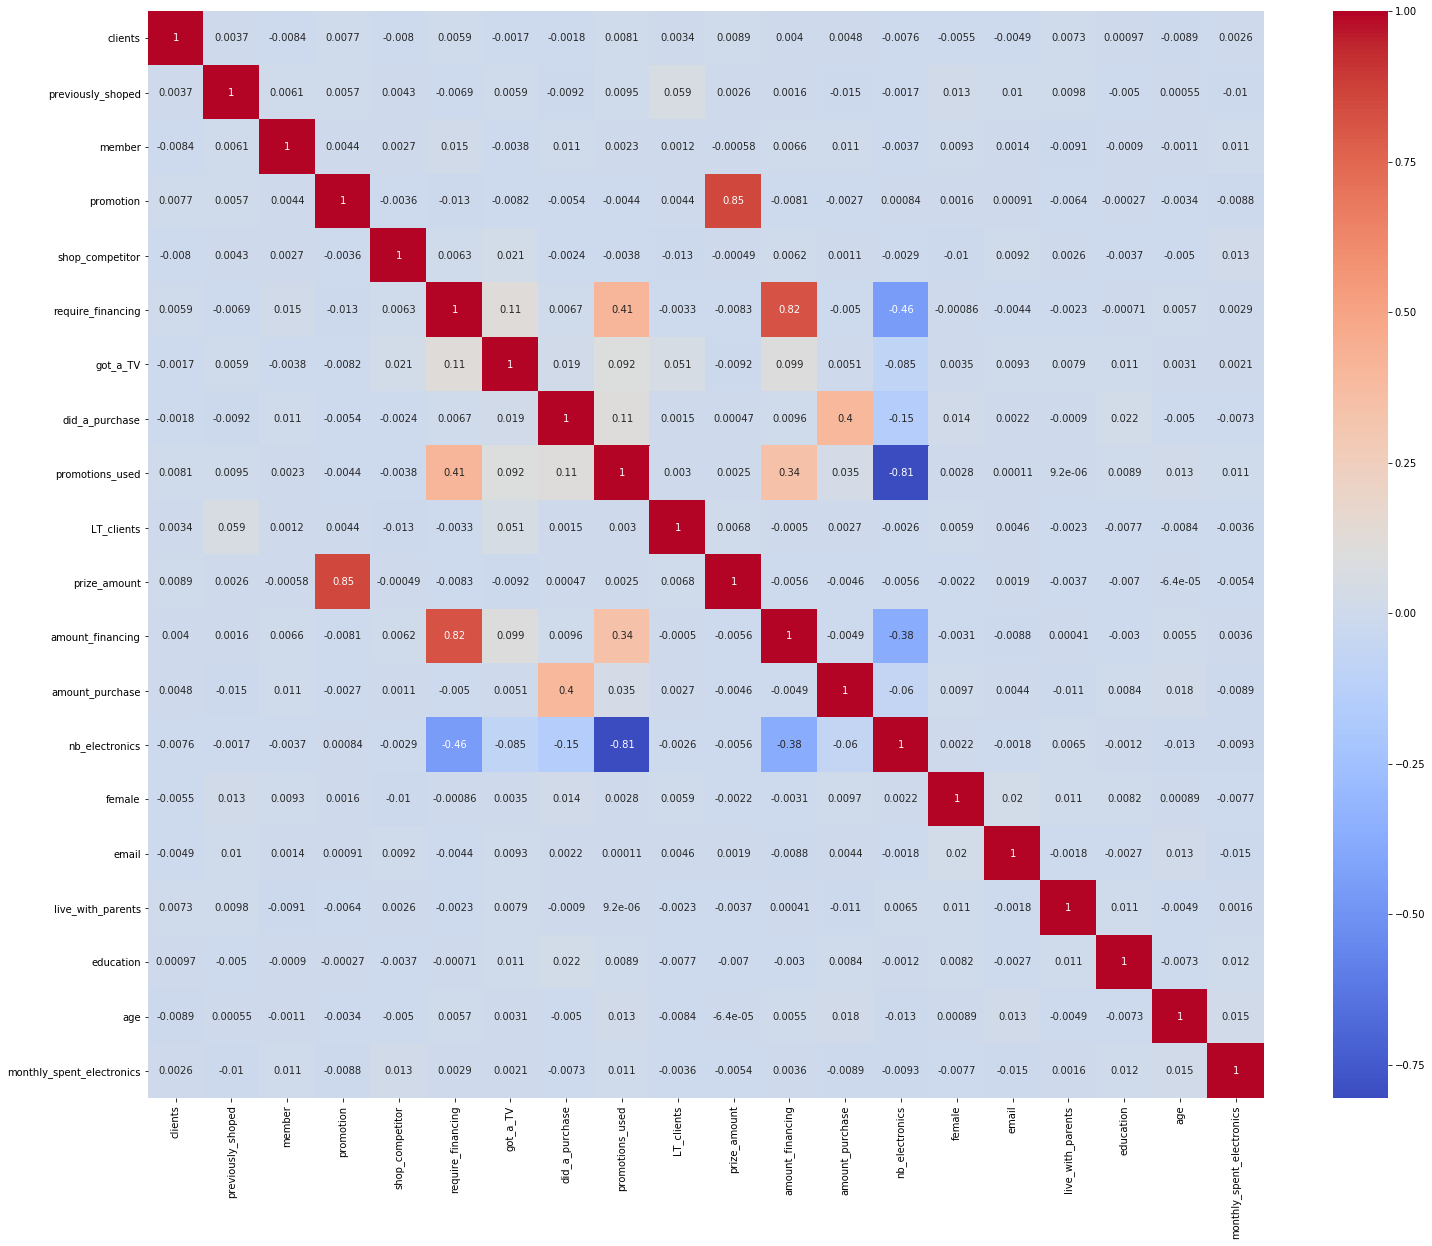

In [30]:
### Correlation

corr_matrix = elect_prof.corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(25,20))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

### Finding from correlation heat map
- Strong correlation between **'prize_amount'** and **'promotion'**
- String correlation between **'amount_finacing'** and **'require_financing'**
- Correlation between **'promotion_used'** and **'require_financing'**
- Correlation between **'amount_purchase'** and **'did_a_purchase'**

In [31]:
# def creating_distplot(size, data, features):
#     plt.figure(figsize=size)
#     for i in range(len(features)):
#         plt.subplot(5, 3, i+1)
#         sns.distplot(data[features[i]])


# num_vars = ['monthly_spent_electronics', 'age', 'promotions_used', 'amount_financing', 'amount_purchase', 'LT_clients']

# # Creating distribution plots
# creating_distplot((16,18), elect_prof, num_vars)
# creating_distplot

In [32]:
# # Subsetting by 'got a TV'!
# bought_tv = data["got_a_TV"] == 1
# no_tv = data["got_a_TV"] == 0

# # Creating the plots
# features = ['monthly_spent_electronics', 'age', 'promotions_used', 'amount_financing', 'amount_purchase', 'LT_clients']
# labels = ['Got a TV', "Didn't get a TV"]

# def creating_plots(features, labels):
#     plt.figure(figsize=(16,6))
#     for feature in features:
#         plt.subplot(3, 2, features.index(feature)+1)
#         sns.distplot(data[feature][bought_tv], label=labels[0], color="b")
#         sns.distplot(data[feature][no_tv], label=labels[1], color="y")
#         plt.axvline(data[feature][bought_tv].mean(), linestyle = '--', color="b")
#         plt.axvline(data[feature][no_tv].mean(), linestyle = '--', color="y")
#         plt.legend()

# creating_plots(features, labels)

In [33]:
# ## Replace outliers and missing value with "median"
# missing_data_amt_pur = elect_prof.amount_purchase.isnull().sum(axis=0)
# print("No. of missing data in amount_purchase column: \n", missing_data_amt_pur)

# # ## take care of outliers
# mean_amt_purc = elect_prof.amount_purchase.mean()
# elect_prof["amount_purchase"] = np.where(elect_prof["amount_purchase"] > 7500, 
#                                          mean_amt_purc, elect_prof['amount_purchase'])

# ## check for column
# display(elect_prof.amount_purchase)

# ## Missing value "NaN" with median
# elect_prof.amount_purchase = elect_prof.amount_purchase.fillna(mean_amt_purc)


# missing_data_amt_pur = elect_prof.amount_purchase.isnull().sum(axis=0)
# print("No. of missing data after 'imputation' in amount_purchase column: \n", missing_data_amt_pur)


# ## Analysis amount_purchase 
# visualize_num_feature(elect_prof.amount_purchase)
# stat_summary(elect_prof.amount_purchase)

In [34]:
## 'clients' are unique features 
##  Deleting 'clients' column

print("Name of all columns: \n", elect_prof.columns.tolist())
elect_prof = elect_prof.drop('clients', axis=1)
print("\n\nName of all columns: \n", elect_prof.columns.tolist())

Name of all columns: 
 ['clients', 'previously_shoped', 'member', 'promotion', 'shop_competitor', 'require_financing', 'got_a_TV', 'did_a_purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics', 'female', 'email', 'live_with_parents', 'work', 'family', 'state', 'education', 'age', 'monthly_spent_electronics']


Name of all columns: 
 ['previously_shoped', 'member', 'promotion', 'shop_competitor', 'require_financing', 'got_a_TV', 'did_a_purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics', 'female', 'email', 'live_with_parents', 'work', 'family', 'state', 'education', 'age', 'monthly_spent_electronics']


## Feature Engineering
- Correlation Matrix with Heatmap
- Univariate Selection
- Feature Importance

 Heat map for categorical columns: 


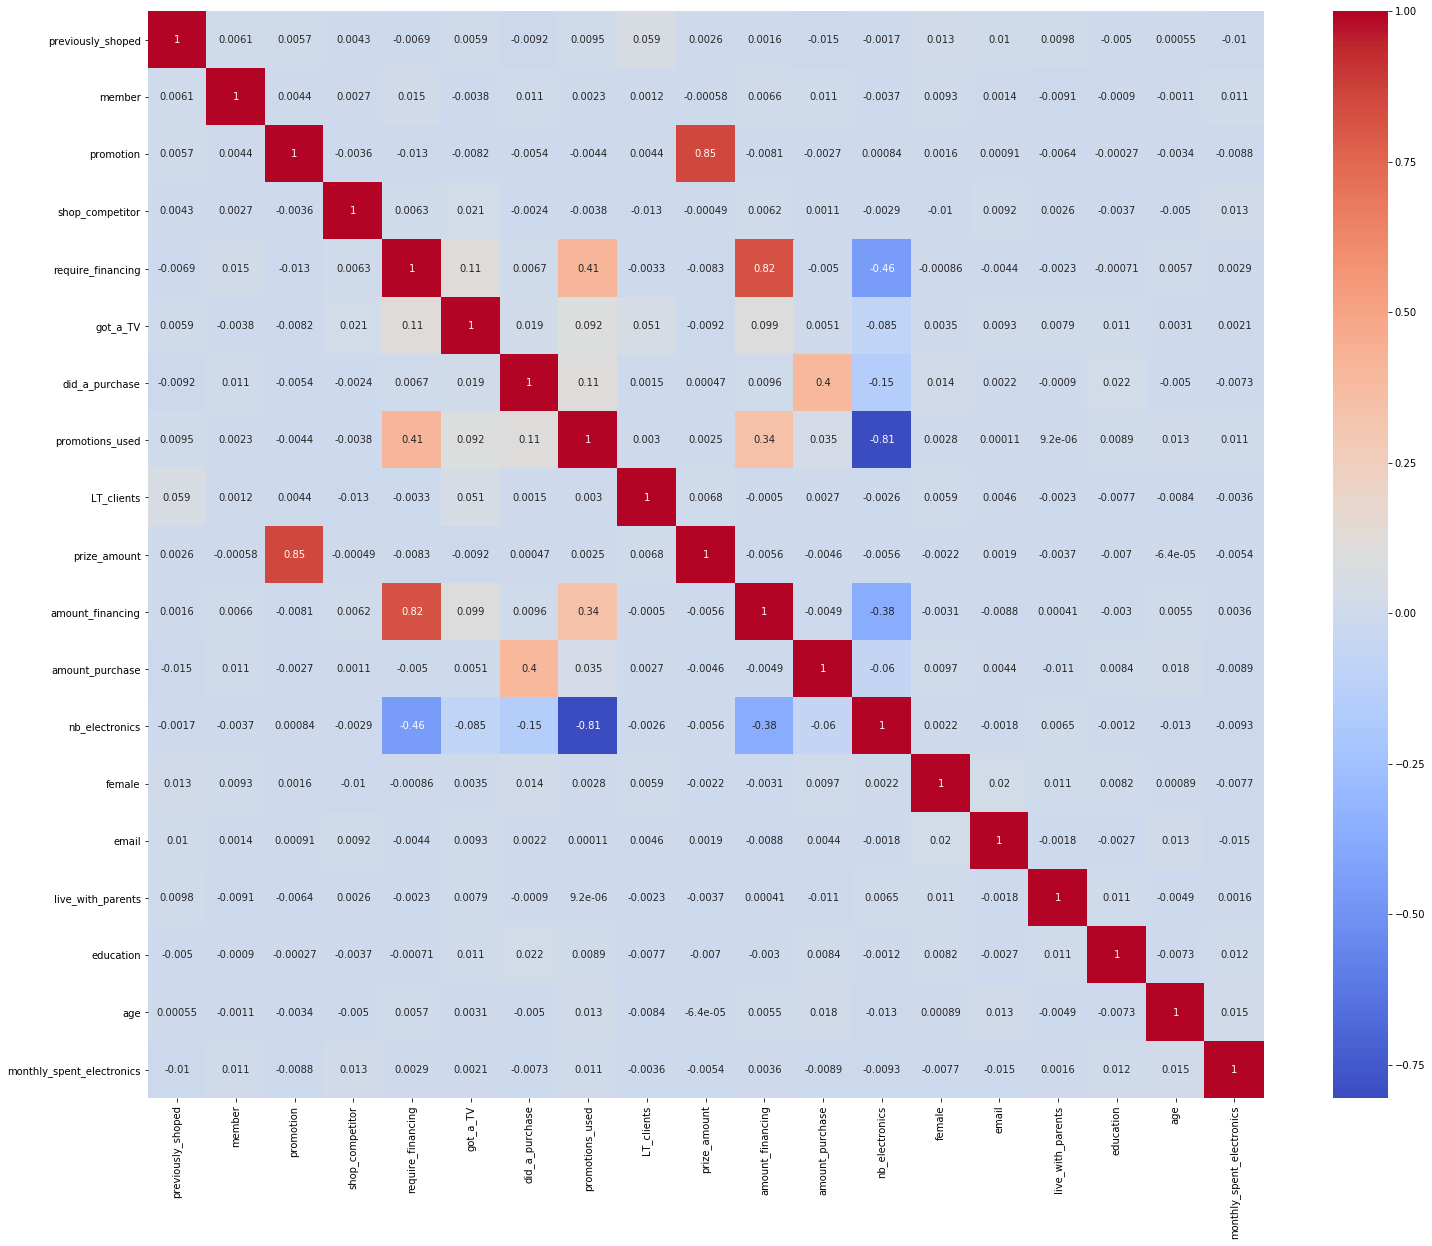

In [35]:
## Correlation Matrix with Heatmap
corr_matrix = elect_prof.corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(25,20))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

In [36]:
num_int_type = elect_prof.select_dtypes(include='int64').columns.tolist()
print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = elect_prof.select_dtypes(include='float64').columns.tolist()
print("\nNumeric-Float Types columns name: \n", num_float_type)

num_type = num_int_type + num_float_type

cat_object_type = elect_prof.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric-Integer Types columns name: 
 ['female', 'email', 'live_with_parents', 'education']

Numeric-Float Types columns name: 
 ['previously_shoped', 'member', 'promotion', 'shop_competitor', 'require_financing', 'got_a_TV', 'did_a_purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics', 'age', 'monthly_spent_electronics']


Categorical Types columns name: 
 ['work', 'family', 'state']


In [37]:
# elect_prof[num_type]

In [38]:

## Create X (features) and y(response)

temp_df = elect_prof[num_type]
X = temp_df.drop('got_a_TV', axis=1)
display(X.head())
y = temp_df['got_a_TV']
display(y.unique())

## Scale the features (X)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
display(X_scaled.head())

,female,email,live_with_parents,education,previously_shoped,member,promotion,shop_competitor,require_financing,did_a_purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics,age,monthly_spent_electronics
0,1,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,0.000000,0.0,0.0,1.0,40.0,5916.666667
1,0,1,0,3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0,57.0,5583.333333
2,1,1,0,2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0,46.0,2666.666667
3,1,1,0,5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0,72.0,5833.333333
4,1,1,0,1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0,79.0,4916.666667


array([0., 1.])

,female,email,live_with_parents,education,previously_shoped,member,promotion,shop_competitor,require_financing,did_a_purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics,age,monthly_spent_electronics
0,1.0,1.0,1.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.106870,0.000000,0.0,0.000000,1.0,0.239437,0.054367
1,0.0,1.0,0.0,0.50,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.091603,0.141184,0.0,0.092212,1.0,0.478873,0.050802
2,1.0,1.0,0.0,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.00,0.045802,0.000000,0.0,0.209346,1.0,0.323944,0.019608
3,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.053435,0.000000,0.0,0.060436,1.0,0.690141,0.053476
4,1.0,1.0,0.0,0.00,1.0,0.0,1.0,1.0,0.0,1.0,0.25,0.068702,0.155325,0.0,0.210592,0.0,0.788732,0.043672


### Univariate Selection


In [39]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func = chi2, k=15)
fit = bestfeatures.fit(X_scaled, y)

In [41]:

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_scaled.columns)

In [42]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']  #naming the dataframe columns
featureScores

,Features,Score
0,female,0.115632
1,email,0.441737
2,live_with_parents,0.893689
3,education,0.841390
4,previously_shoped,0.654518
5,member,0.216142
6,promotion,0.812594
7,shop_competitor,5.944931
8,require_financing,194.496697
9,did_a_purchase,0.349759


In [43]:
print(featureScores.nlargest(23,'Score'))  #print 15 best features

                     Features       Score
8           require_financing  194.496697
15             nb_electronics   87.161345
10            promotions_used   38.303211
13           amount_financing   22.429016
7             shop_competitor    5.944931
11                 LT_clients    1.512354
2           live_with_parents    0.893689
3                   education    0.841390
6                   promotion    0.812594
4           previously_shoped    0.654518
1                       email    0.441737
9              did_a_purchase    0.349759
12               prize_amount    0.216569
5                      member    0.216142
0                      female    0.115632
16                        age    0.025412
14            amount_purchase    0.020653
17  monthly_spent_electronics    0.001628


### Feature Importance

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [45]:
model = ExtraTreesClassifier()
model.fit(X_scaled, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [46]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02470372 0.0208431  0.02121706 0.07711708 0.01395092 0.02161713
 0.01230951 0.01487726 0.01052155 0.00482066 0.02947013 0.14836737
 0.06262695 0.05386824 0.1571246  0.00481558 0.15944546 0.16230367]


(20440, 18)

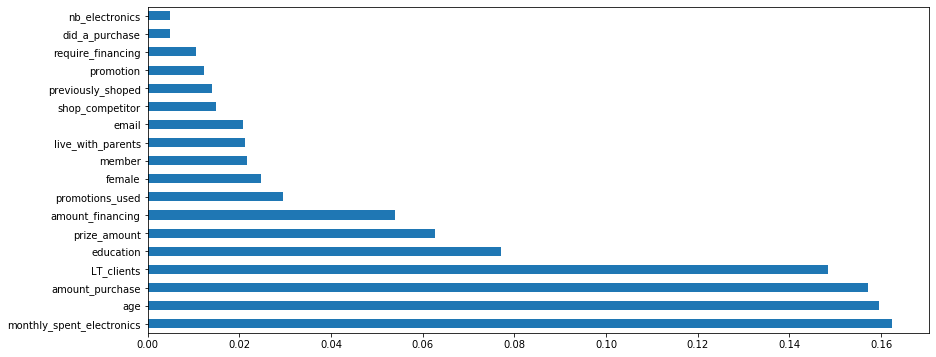

In [47]:
#plot graph of feature importances for better visualization

display(X_scaled.shape)
feat_importances = pd.Series(model.feature_importances_, index = X_scaled.columns)
plt.figure(figsize = (14, 6))
feat_importances.nlargest(23).plot(kind ='barh')
plt.show()

In [48]:
### Removing irrelevant columns



## Saving dataframe as 'pentatonicTV.csv' for Modeling

In [49]:
elect_prof.to_csv('pentatonicTV.csv', index=False)